In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore') 

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image


0: 640x640 2 1.00, 1 0.00, 4 0.00, 5 0.00, 3 0.00, 268.1ms
Speed: 17.5ms preprocess, 268.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


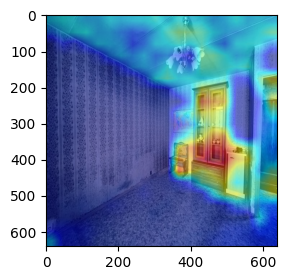

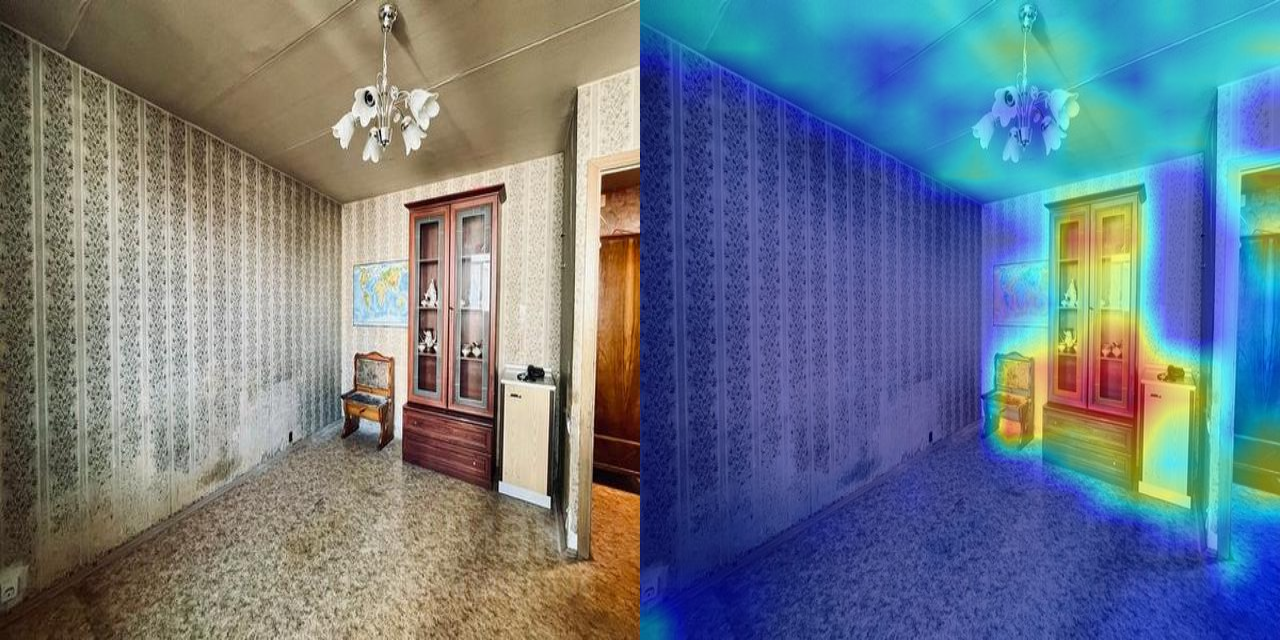

In [6]:
img = cv2.imread(
    r"D:\MY_PROJECTS\diplom_hse\train_models\prepared_data_2\train\2\9dee1e4a-1220-11f0-8d09-ced717198e39.jpg"
)


model = YOLO(r"D:\MY_PROJECTS\diplom_hse\runs\classify\train13\weights\best.pt")
model = model.cpu()
target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]
cam = EigenCAM(model, target_layers, task="cls")


img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
display(Image.fromarray(np.hstack((im, cam_image))));